# MNIST CLASSIFICATION

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

2022-03-06 21:26:43.898978: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-06 21:26:43.899033: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape

(28, 28)

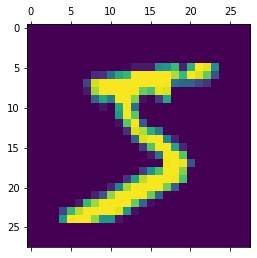

In [5]:
plt.matshow(x_train[0])
plt.show()

### reshaping the dataset 

In [6]:
x_train,x_test = x_train/255,x_test/255
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [7]:
x_test_flattened.shape

(10000, 784)

In [8]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
model = keras.Sequential([keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')])
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train_flattened,y_train,epochs = 5)

2022-03-06 21:26:51.886593: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-06 21:26:51.886663: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-06 21:26:51.886706: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (archit): /proc/driver/nvidia/version does not exist
2022-03-06 21:26:51.887260: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5


2022-03-06 21:26:52.459869: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 10s 4ms/step - loss: 0.4730 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3045 - accuracy: 0.9154
Epoch 3/5
 297/1875 [===>..........................] - ETA: 7s - loss: 0.2736 - accuracy: 0.9231

In [ ]:
model.evaluate(x_test_flattened,y_test)

let's predict the first image

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

In [ ]:
np.argmax(y_predicted[0])

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')

In [ ]:
model = keras.Sequential([keras.layers.Dense(100,input_shape = (784,),activation = 'relu'),keras.layers.Dense(10,activation = 'sigmoid')])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])


In [ ]:
model.fit(x_train_flattened,y_train,epochs = 5)

In [ ]:
model.evaluate(x_test_flattened, y_test)

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')

In [ ]:
model.save("model.h5")